In [50]:
import matplotlib.pyplot as plt
import os
import numpy as np
import json

log_finn_root = f'/disk/vanishing_data/ju878/log_finn/'
eval_root = os.path.join(log_finn_root, 'groundtruth_eval')
eval_all_root = os.path.join(log_finn_root, 'groundtruth_eval_all')
eval_all_anno_root = os.path.join(log_finn_root, 'groundtruth_eval_all_annotation')
eval_counts_file = os.path.join(eval_root, 'counts.txt')
eval_all_counts_file = os.path.join(eval_all_root, 'counts.txt')
eval_all_anno_counts_file = os.path.join(eval_all_anno_root, 'counts.txt')

#     0      1     2    3     4    5    6    7     8    9   10  11  12  13  14  15  16  17    18         19           20
#    c_11, c_12, c_13, c_14, c11, c12, c13, c14, c_10, c10, c1, c2, c3, c4, tp, fp, fn, tn, total, original_total, new_label_total
eval_all_counts = np.loadtxt(eval_all_counts_file, delimiter=',')
eval_all_anno_counts = np.loadtxt(eval_all_anno_counts_file, delimiter=',')

eval_once_counts = eval_all_counts[:1034]
eval_kitti_counts = eval_all_counts[1034:1341]
eval_nuscenes_counts = eval_all_counts[1341:]

eval_once_anno_counts = eval_all_anno_counts[:4413]
eval_kitti_anno_counts = eval_all_anno_counts[4413:4812]
eval_nuscenes_anno_counts = eval_all_anno_counts[4812:]

eval_all_anno_counts_cut = eval_all_anno_counts[np.sum(eval_all_anno_counts, axis=1) != 0]
eval_once_anno_counts_cut = eval_once_anno_counts[np.sum(eval_once_anno_counts, axis=1) != 0]
eval_kitti_anno_counts_cut = eval_kitti_anno_counts[np.sum(eval_kitti_anno_counts, axis=1) != 0]
eval_nuscenes_anno_counts_cut = eval_nuscenes_anno_counts[np.sum(eval_nuscenes_anno_counts, axis=1) != 0]

eval_all = [eval_all_counts, eval_once_counts, eval_kitti_counts, eval_nuscenes_counts, 
            eval_all_anno_counts_cut, eval_once_anno_counts_cut, eval_kitti_anno_counts_cut, eval_nuscenes_anno_counts_cut]

with open('/disk/ml/own_datasets/CODA/corner_case.json', 'r') as f:
    data_cornercases = json.load(f)
    
categories = data_cornercases['categories']
images = data_cornercases['images']
annotations = data_cornercases['annotations']

annotations_cut = []
for annotation in annotations:
    if not np.sum(eval_all_anno_counts[annotation['id'] - 1], axis=0) == 0:
        annotations_cut.append(annotation)
        


sum_all_counts = np.sum(eval_all_counts, axis=0)
sum_once_counts = np.sum(eval_once_counts, axis=0)
sum_kitti_counts = np.sum(eval_kitti_counts, axis=0)
sum_nuscenes_counts = np.sum(eval_nuscenes_counts, axis=0)

sum_all = [sum_all_counts, sum_once_counts, sum_kitti_counts, sum_nuscenes_counts]

dataset_names = ['CODA', 'CODA-ONCE', 'CODA-KITTI', 'CODA-nuScenes', 'CODA-Anno', 'CODA-ONCE-Anno', 'CODA-KITTI-Anno', 'CODA-nuScenes-Anno']
categorie_names = ['sc_pedestrian', 'sc_cyclist', 'sc_vehicle', 'sc_animal', 'sc_traffic_facility', 'sc_obstruction', 'sc_misc', 
                   'c_pedestrian', 'c_cyclist', 'c_car', 'c_truck', 'c_tram', 'c_tricycle', 'c_bus', 'c_bicycle', 'c_moped', 'c_motorcycle',
                   'c_stroller', 'c_wheelchair', 'c_cart', 'c_trailer', 'c_construction_vehicle', 'c_recreational_vehicle', 'c_dog', 'c_barrier', 
                   'c_bollard', 'c_warning_sign', 'c_sentry_box', 'c_traffic_box', 'c_traffic_cone', 'c_traffic_island', 'c_traffic_light', 
                   'c_traffic_sign', 'c_debris', 'c_suitcace', 'c_dustbin', 'c_concrete_block', 'c_machinery', 'c_chair', 'c_phone_booth', 'c_basket',
                   'c_misc']
cm_names = ['All', 'Boxes', 'Overlap']
cm_anno_names = ['Boxes', 'Overlap']

labels = ['tp', 'fp', 'fn', 'tn']
title = ['Total', 'Boxes', 'Overlap']


In [2]:
supercategories = ['pedestrian', 'cyclist', 'vehicle', 'animal', 'traffic_facility', 'obstruction', 'misc']
sc_pedestrian = []
sc_cyclist = []
sc_vehicle = []
sc_animal = []
sc_traffic_facility = []
sc_obstruction = []
sc_misc = []
c_pedestrian = []
c_cyclist = []
c_car = []
c_truck = []
c_tram = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
c_tricycle = []
c_bus = []
c_bicycle = []
c_moped = []
c_motorcycle = []
c_stroller = []
c_wheelchair = []
c_cart = []
c_trailer = []
c_construction_vehicle = []
c_recreational_vehicle = []
c_dog = []
c_barrier = []
c_bollard = []
c_warning_sign = []
c_sentry_box = []
c_traffic_box = []
c_traffic_cone = []
c_traffic_island = []
c_traffic_light = []
c_traffic_sign = []
c_debris = []
c_suitcace = []
c_dustbin = []
c_concrete_block = []
c_machinery = []
c_chair = []
c_phone_booth = []
c_basket = []
c_misc = []

for index_anno, annotation in enumerate(annotations_cut):
    for categorie in categories:
        if annotation['category_id'] == categorie['id']:
            categorie_name = categorie['name']
            if f'c_{categorie_name}' in globals() and isinstance(globals()[f'c_{categorie_name}'], list):
                    globals()[f'c_{categorie_name}'].append(eval_all_anno_counts_cut[index_anno])
            for index_sc, sc in enumerate(supercategories):
                if categorie['supercategory'] == sc:
                    if f'sc_{sc}' in globals() and isinstance(globals()[f'sc_{sc}'], list):
                        globals()[f'sc_{sc}'].append(eval_all_anno_counts_cut[index_anno])

eval_anomalies = [sc_pedestrian, sc_cyclist, sc_vehicle, sc_animal, sc_traffic_facility, sc_obstruction, sc_misc,
                  c_pedestrian, c_cyclist, c_car, c_truck, c_tram, c_tricycle, c_bus, c_bicycle, c_moped, c_motorcycle,
                  c_stroller, c_wheelchair, c_cart, c_trailer, c_construction_vehicle, c_recreational_vehicle, c_dog, c_barrier, 
                  c_bollard, c_warning_sign, c_sentry_box, c_traffic_box, c_traffic_cone, c_traffic_island, c_traffic_light, 
                  c_traffic_sign, c_debris, c_suitcace, c_dustbin, c_concrete_block, c_machinery, c_chair, c_phone_booth, c_basket,
                  c_misc
                  ] 
#print(c_car)

In [35]:
print(len(eval_anomalies[9]))
print(len(eval_anomalies[10]))
print(len(eval_anomalies[11]))
print(len(eval_anomalies[12]))
print(len(eval_anomalies[13]))
print(len(eval_anomalies[14]))
print(len(eval_anomalies[15]))
print(len(eval_anomalies[16]))
print(len(eval_anomalies[17]))
print(len(eval_anomalies[18]))
print(len(eval_anomalies[19]))
print(len(eval_anomalies[20]))
print(len(eval_anomalies[21]))
print(len(eval_anomalies[22]))
print(len(eval_anomalies[2]))
print(len(eval_anomalies[7]))

79
6
1
16
71
58
224
89
17
11
23
155
25
92
866
17


In [3]:

def plotgraph(counts, dataset, part):
    if len(counts) == 2:
        # Create a pie plot
        fig = plt.figure(figsize=(6, 3), tight_layout=False)
        fig.suptitle(f'{dataset}')
        ax = fig.add_subplot(121)
        ax.pie(counts[0], labels=labels, autopct='%1.1f%%')
        ax.set_title(f'{title[1]} - {part} - {round(sum(counts[0]),0)}')

        ax = fig.add_subplot(122)
        ax.pie(counts[1], labels=labels, autopct='%1.1f%%')
        ax.set_title(f'{title[2]} - {part} - {round(sum(counts[1]),0)}')
    else:
        # Create a pie plot
        fig = plt.figure(figsize=(8, 3), tight_layout=False)
        fig.suptitle(f'{dataset}')
        ax = fig.add_subplot(131)
        ax.pie(counts[0], labels=labels, autopct='%1.1f%%')
        ax.set_title(f'{title[0]} - {part} - {round(sum(counts[0]),0)}')

        ax = fig.add_subplot(132)
        ax.pie(counts[1], labels=labels, autopct='%1.1f%%')
        ax.set_title(f'{title[1]} - {part} - {round(sum(counts[1]),0)}')

        ax = fig.add_subplot(133)
        ax.pie(counts[2], labels=labels, autopct='%1.1f%%')
        ax.set_title(f'{title[2]} - {part} - {round(sum(counts[2]),0)}')

    fig.savefig(f'/disk/no_backup/ju878/model_contradictions/create_coda/graphics/evaluate_anomaly_counts/{dataset}_{part}.svg', format='svg', dpi=1200)
    # Display the plot
    #plt.show()
    plt.close()
    
def get_confusion_matrix(eval_all):
    tp_all = 0
    fp_all = 0
    fn_all = 0
    tn_all = 0

    tp_boxes = 0
    fp_boxes = 0
    fn_boxes = 0
    tn_boxes = 0

    tp_overlap = 0
    fp_overlap = 0
    fn_overlap = 0
    tn_overlap = 0
    
    for e in eval_all:
        
        tp_all += e[14] / e[18]
        fp_all += e[15] / e[18]
        fn_all += e[16] / e[18]
        tn_all += e[17] / e[18]

        tp_boxes += (e[6] + e[7]) / e[19]
        fp_boxes += (e[2] + e[3]) / e[19]
        fn_boxes += (e[4] + e[5] + e[9]) / e[19]
        tn_boxes += (e[0] + e[1] + e[8]) / e[19]

        if not (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]) == 0:
            tp_overlap += (e[6] + e[7]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7])
            fp_overlap += (e[2] + e[3]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7])
            fn_overlap += (e[4] + e[5]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7])
            tn_overlap += (e[0] + e[1]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7])
            
    
    counts_all = [tp_all, fp_all, fn_all, tn_all]
    counts_boxes = [tp_boxes, fp_boxes, fn_boxes, tn_boxes]
    counts_overlap = [tp_overlap, fp_overlap, fn_overlap, tn_overlap]
    
    return counts_all, counts_boxes, counts_overlap

def print_graphs():
        
    for e in eval_all:
        counts = get_confusion_matrix(e)
    
        plotgraph(counts)

In [4]:
def create_iou(eval_counts):
    iou = []
    for eval in eval_counts:
        if (eval[2] + eval[3] + eval[4] + eval[5] + eval[6] + eval[7] + eval[12] + eval[13]) == 0:
            iou.append(0)
            continue
        iou.append((eval[6] + eval[7]) / (eval[2] + eval[3] + eval[4] + eval[5] + eval[6] + eval[7] + eval[12] + eval[13]))
    return iou
 
def get_iou(iou, eval_counts, ious):
    count_iou_75 = 0
    iou_75 = []
    count_iou_50 = 0
    iou_50 = []
    count_iou_0 = 0
    iou_0 = []
    for index, i in enumerate(iou):
        if i >= ious[0]:
            iou_75.append(eval_counts[index])
            count_iou_75 += 1

        if i >= ious[1]:
            iou_50.append(eval_counts[index])
            count_iou_50 += 1


        iou_0.append(eval_counts[index])
        count_iou_0 += 1
        
    return count_iou_75, iou_75, count_iou_50, iou_50, count_iou_0, iou_0
    
def get_AR(count_iou_75, iou_75, count_iou_50, iou_50, count_iou_0, iou_0):
    recall_75 = 0
    recall_50 = 0
    recall_0 = 0

    for i in iou_75:
        if (i[6] + i[7] + i[4] + i[5]) == 0:
            recall_75 += 0
            continue
        recall_75 += (i[6] + i[7]) / (i[6] + i[7] + i[4] + i[5])
    for i in iou_50:
        if (i[6] + i[7] + i[4] + i[5] ) == 0:
            recall_50 += 0
            continue
        recall_50 += (i[6] + i[7]) / (i[6] + i[7] + i[4] + i[5] )
    for i in iou_0:
        if (i[6] + i[7] + i[4] + i[5]) == 0:
            recall_0 += 0
            continue
        recall_0 += (i[6] + i[7]) / (i[6] + i[7] + i[4] + i[5] )
        
    if not count_iou_75 == 0:
        recall_75 = recall_75 / count_iou_75
    
    if not count_iou_50 == 0:
        recall_50 = recall_50 / count_iou_50
        
    if not count_iou_0 == 0:
        recall_0 = recall_0 / count_iou_0
    
    
    return recall_75, recall_50, recall_0

def get_AP(count_iou_75, iou_75, count_iou_50, iou_50, count_iou_0, iou_0):
    precision_75 = 0
    precision_50 = 0
    precision_0 = 0
    for i in iou_75:
        if (i[6] + i[7] + i[2] + i[3] + i[12] + i[13]) == 0:
            precision_75 += 1
            continue
        precision_75 += (i[6] + i[7]) / (i[6] + i[7] + i[2] + i[3] + i[12] + i[13])
    for i in iou_50:
        if (i[6] + i[7] + i[2] + i[3] + i[12] + i[13]) == 0:
            precision_50 += 1
            continue
        precision_50 += (i[6] + i[7]) / (i[6] + i[7] + i[2] + i[3] + i[12] + i[13])
    for i in iou_0:
        if (i[6] + i[7] + i[2] + i[3] + i[12] + i[13]) == 0:
            precision_0 += 1
            continue
        precision_0 += (i[6] + i[7]) / (i[6] + i[7] + i[2] + i[3] + i[12] + i[13])
    if not count_iou_75 == 0:
        precision_75 = precision_75 / count_iou_75
    
    if not count_iou_50 == 0:
        precision_50 = precision_50 / count_iou_50
        
    if not count_iou_0 == 0:
        precision_0 = precision_0 / count_iou_0
    
    
    return precision_75, precision_50, precision_0

def precision_recall_curve(iou, eval_counts, thresholds):
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        recall = 0
        precision = 0
        count_precision = 0
        count_recall = 0
        for index, i in enumerate(iou):
            if i >= threshold:
                eval = eval_counts[index]
                if (eval[6] + eval[7] + eval[2] + eval[3] + eval[12] + eval[13]) == 0:
                    precision += 1
                    continue
                precision += ((eval[6] + eval[7]) / (eval[6] + eval[7] + eval[2] + eval[3] + eval[12] + eval[13]))
                count_precision += 1
                if (eval[6] + eval[7] + eval[4] + eval[5]) == 0:
                    recall += 1
                    continue
                recall += ((eval[6] + eval[7]) / (eval[6] + eval[7] + eval[4] + eval[5] ))
                count_recall += 1
        if not count_precision == 0:
            precisions.append(precision / count_precision)
        if not count_recall == 0:
            recalls.append(recall / count_recall)
                    
    return precisions, recalls

def print_AP_and_AR(eval_counts):
    iou = create_iou(eval_counts)
    
    thresholds= np.arange(start=0.2, stop=0.7, step=0.05)
    precisions, recalls = precision_recall_curve(iou, eval_counts, thresholds)
    
    print(precisions)
    print(recalls)
    
    plt.plot(recalls, precisions, linewidth=4, color="red")
    plt.xlabel("Recall", fontsize=12, fontweight='bold')
    plt.ylabel("Precision", fontsize=12, fontweight='bold')
    plt.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
    plt.show()
    
    
    ious = [0.75, 0.5]
    count_iou_75, iou_75, count_iou_50, iou_50, count_iou_0, iou_0 = get_iou(iou, eval_counts, ious)
    print(iou)
    recall_75, recall_50, recall_0 = get_AR(count_iou_75, iou_75, count_iou_50, iou_50, count_iou_0, iou_0)
    precision_75, precision_50, precision_0 = get_AP(count_iou_75, iou_75, count_iou_50, iou_50, count_iou_0, iou_0)
    
    if not (precision_0 + recall_0) == 0:
        f1_0 = (2 * (precision_0 * recall_0)) / (precision_0 + recall_0)
    else:
        f1_0 = 'Null'
    if not (precision_50 + recall_50) == 0:
        f1_50 = (2 * (precision_50 * recall_50)) / (precision_50 + recall_50)
    else:
        f1_50 = 'Null'
    if not (precision_75 + recall_75) == 0:
        f1_75 = (2 * (precision_75 * recall_75)) / (precision_75 + recall_75)
    else:
        f1_75 = 'Null'
        
    
    
    print('\nNew Data')
    print('\nAR_0: ' + str(recall_0))
    print('AR_50: ' + str(recall_50))
    print('AR_75: ' + str(recall_75))
    
    print('\nAP_0: ' + str(precision_0))
    print('AP_50: ' + str(precision_50))
    print('AP_75: ' + str(precision_75))
    
    print('\nF1_0: ' + str(f1_0))
    print('F1_50: ' + str(f1_50))
    print('F1_75: ' + str(f1_75))
       
def create_AP_and_AR(eval_all):
    for e in eval_all:
        print_AP_and_AR(e)

In [5]:
def create_iou_without_cm(eval_counts):
    iou = []
    for eval in eval_counts:
        if (eval[2] + eval[3] + eval[4] + eval[5] + eval[6] + eval[7] + eval[12] + eval[13]) == 0:
            iou.append(0)
            continue
        iou.append((eval[6] + eval[7]) / (eval[2] + eval[3] + eval[4] + eval[5] + eval[6] + eval[7] + eval[12] + eval[13]))
    return iou

def create_mean_iou(cms):
    iou = []
    for i in range(len(cms[0])):
        if (cms[0][i] + cms[1][i] + cms[2][i]) == 0:
            iou.append(0)
            continue
        iou.append((cms[0][i]) / (cms[0][i] + cms[1][i] + cms[2][i]))
    return iou

def create_iou(cm):
    if not (cm[0] + cm[1] + cm[2]) == 0:
        iou = cm[0] / (cm[0] + cm[1] + cm[2])
    else:
        iou = 0    
    return iou

In [6]:
def create_mean_cm(eval):
    cm_all = [[],[],[],[]]
    cm_boxes = [[],[],[],[]]
    cm_overlap = [[],[],[],[]]
    for e in eval:
        if not (e[18]) == 0:
            cm_all[0].append(e[14] / e[18])
            cm_all[1].append(e[15] / e[18])
            cm_all[2].append(e[16] / e[18])
            cm_all[3].append(e[17] / e[18])

        if not (e[19]) == 0:
            cm_boxes[0].append((e[6] + e[7]) / e[19])
            cm_boxes[1].append((e[2] + e[3]) / e[19])
            cm_boxes[2].append((e[4] + e[5] + e[9]) / e[19])
            cm_boxes[3].append((e[0] + e[1] + e[8]) / e[19])

        if not (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]) == 0:
            cm_overlap[0].append((e[6] + e[7]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]))
            cm_overlap[1].append((e[2] + e[3]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]))
            cm_overlap[2].append((e[4] + e[5]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]))
            cm_overlap[3].append((e[0] + e[1]) / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]))
    
    return cm_all, cm_boxes, cm_overlap

def create_cm(eval):
    e = np.sum(eval, axis=0)
    cm_all = [e[14], e[15], e[16], e[17]]
    cm_boxes = [e[6] + e[7], e[2] + e[3], e[4] + e[5] + e[9], e[0] + e[1] + e[8]]
    cm_overlap = [e[6] + e[7], e[2] + e[3], e[4] + e[5], e[0] + e[1]]
    
        
    if not (e[18]) == 0:
        cm_all = cm_all / e[18]
    if not (e[19]) == 0:
        cm_boxes = cm_boxes / e[19]
    if not (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7]) == 0:
        cm_overlap = cm_overlap / (e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[6] + e[7])
    
    return cm_all, cm_boxes, cm_overlap



In [43]:
def get_mean(index, e):
    mean_iou = []
    mean_ap = []
    mean_ar = []
    mean_f1 = []
    mean_cm = []
    confusion_matrices = create_mean_cm(e)
    for i, cms in enumerate(confusion_matrices):
        
        if index >= 4 and i == 0:
            continue
        
        m_iou = create_mean_iou(cms)
        if not len(m_iou) == 0:
            iou = sum(m_iou) / len(m_iou)
        else:
            iou = 0
        
        precision = 0
        counter_precision = 0
        recall = 0
        counter_recall = 0
        for cm in range(len(cms[0])):
            counter_precision += 1
            counter_recall += 1
            if (cms[0][cm] + cms[1][cm]) == 0:
                continue
            precision += (cms[0][cm]) / (cms[0][cm] + cms[1][cm])
            if (cms[0][cm] + cms[2][cm]) == 0:
                continue
            recall += (cms[0][cm]) / (cms[0][cm] + cms[2][cm])
            
        if not counter_precision == 0:
            precision = (precision / counter_precision)
        if not counter_recall == 0:
            recall = (recall / counter_recall)
        if not (precision + recall) == 0:
            f1 = (2 * (precision * recall)) / (precision + recall)
        else:
            f1 = 0
        
        mean_iou.append(iou)  
        mean_ap.append(precision)
        mean_ar.append(recall)
        mean_f1.append(f1)
        
        conf_mat = [0, 0, 0, 0]
        for cm in range(len(cms[0])):
            conf_mat[0] += cms[0][cm]
            conf_mat[1] += cms[1][cm]
            conf_mat[2] += cms[2][cm]
            conf_mat[3] += cms[3][cm]
        for c in range(len(conf_mat)):
            if not len(cms[0]) == 0:
                conf_mat[c] = conf_mat[c] / len(cms[0])
        mean_cm.append(conf_mat)
    return mean_iou, mean_ap, mean_ar, mean_f1, mean_cm

In [45]:
def get_average(index, e):
    average_iou = []
    average_ap = []
    average_ar = []
    average_f1 = []
    confusion_matrices = create_cm(e)
    for i, cms in enumerate(confusion_matrices):
        
        if index >= 4 and i == 0:
            continue
        
        iou = create_iou(cms)
        if not (cms[0] + cms[1]) == 0:
            precision = (cms[0]) / (cms[0] + cms[1])
        else:
            precision = 0
        if not (cms[0] + cms[2]) == 0:
            recall = (cms[0]) / (cms[0] + cms[2])
        else:
            recall = 0
        
        if not (precision + recall) == 0:
            f1 = (2 * (precision * recall)) / (precision + recall)
        else:
            f1 = 0
            
        average_iou.append(iou)  
        average_ap.append(precision)
        average_ar.append(recall) 
        average_f1.append(f1)
    
    if index >= 4:
        confusion_matrices = confusion_matrices[1:]
    return average_iou, average_ap, average_ar, average_f1, confusion_matrices

In [40]:
def get_IoU_AP_AR_F1_datasets(eval_all):
    for index, e in enumerate(eval_all):
        mean = get_mean(index, e)
        average = get_average(index, e)
        
        for i in range(len(mean[4])):
            print(f'{dataset_names[index]}: {cm_names[i]}')
            print('mean IoU: ' + str(round(mean[0][i] * 100, 1)))
            print('mean AP: ' + str(round(mean[1][i] * 100, 1)))
            print('mean AR: ' + str(round(mean[2][i] * 100, 1)))
            print('mean F1: ' + str(round(mean[3][i] * 100, 1)))
            
            print('IoU: ' + str(round(average[0][i] * 100, 1)))
            print('AP: ' + str(round(average[1][i] * 100, 1)))
            print('AR: ' + str(round(average[2][i] * 100, 1)))
            print('F1: ' + str(round(average[3][i] * 100, 1)) + '\n')
        
        plotgraph(mean[4], dataset_names[index], 'Individual')
        plotgraph(average[4], dataset_names[index], 'Aggregated')
             

In [55]:
def get_IoU_AP_AR_F1_anomalies(eval_all):
    for index, e in enumerate(eval_all):
        mean = get_mean(4, e)
        average = get_average(4, e)
        
        for i in range(len(mean[4])):
            print(f'{categorie_names[index]}: {cm_anno_names[i]}')
            #print('& ' + categorie_names[index].split('_')[1] + ' & ' +
            #      str(round(mean[0][i] * 100, 1)) + ' & ' + 
            #      str(round(mean[1][i] * 100, 1)) + ' & ' + 
            #      str(round(mean[2][i] * 100, 1)) + ' & ' + 
            #      str(round(mean[3][i] * 100, 1)) + ' & ' + 
            #      str(round(average[0][i] * 100, 1)) + ' & ' + 
            #      str(round(average[1][i] * 100, 1)) + ' & ' + 
            #      str(round(average[2][i] * 100, 1)) + ' & ' + 
            #      str(round(average[3][i] * 100, 1)) + ' \\\\'
            #      )
            print('mean IoU: ' + str(round(mean[0][i] * 100, 1)))
            print('mean AP: ' + str(round(mean[1][i] * 100, 1)))
            print('mean AR: ' + str(round(mean[2][i] * 100, 1)))
            print('mean F1: ' + str(round(mean[3][i] * 100, 1)))
            
            print('IoU: ' + str(round(average[0][i] * 100, 1)))
            print('AP: ' + str(round(average[1][i] * 100, 1)))
            print('AR: ' + str(round(average[2][i] * 100, 1)))
            print('F1: ' + str(round(average[3][i] * 100, 1)) + '\n')
        
        plotgraph(mean[4], categorie_names[index], 'Individual')
        plotgraph(average[4], categorie_names[index], 'Aggregated')

In [23]:
get_IoU_AP_AR_F1_datasets(eval_all)
#print_graphs()
#get_IoU_AP_AR_F1_anomalies(eval_anomalies)



53
0.037535410764872525
256
0.1813031161473088
398
0.3052147239263804
CODA: All
mean IoU: 0.08928770493945883
mean AP: 0.13157344687544464
mean AR: 0.26205016228759104
mean F1: 0.1751868653395084
IoU: 0.107786582952542
AP: 0.13705806997678116
AR: 0.3354111938554296
F1: 0.19459810149579979

CODA: Boxes
mean IoU: 0.23109938110372177
mean AP: 0.5080714160840355
mean AR: 0.2620501622875911
mean F1: 0.3457640995335418
IoU: 0.311579524889231
AP: 0.8143067806515624
AR: 0.3354111938554296
F1: 0.47512105667484456

CODA: Overlap
mean IoU: 0.32427599488807834
mean AP: 0.5501509505449832
mean AR: 0.3788935737064352
mean F1: 0.44873771770613335
IoU: 0.4047802022406248
AP: 0.8143067806515623
AR: 0.44594317995742594
F1: 0.5762897307279818

25
0.024177949709864602
171
0.1653771760154739
302
0.3065989847715736
CODA-ONCE: All
mean IoU: 0.08925215356963062
mean AP: 0.13961601871700438
mean AR: 0.2711722899875854
mean F1: 0.18432849578329125
IoU: 0.08767643291639013
AP: 0.1110488452155104
AR: 0.2940720541

In [56]:
get_IoU_AP_AR_F1_anomalies(eval_anomalies)

sc_pedestrian: Boxes
& pedestrian & 28.3 & 41.5 & 31.0 & 35.5 & 53.8 & 79.0 & 62.7 & 70.0 \\
sc_pedestrian: Overlap
& pedestrian & 33.9 & 44.1 & 37.3 & 40.4 & 57.7 & 79.0 & 68.1 & 73.2 \\
sc_cyclist: Boxes
& cyclist & 32.5 & 53.4 & 38.6 & 44.8 & 38.0 & 76.6 & 42.9 & 55.0 \\
sc_cyclist: Overlap
& cyclist & 41.6 & 58.3 & 49.5 & 53.5 & 49.0 & 76.6 & 57.6 & 65.8 \\
sc_vehicle: Boxes
& vehicle & 22.8 & 41.0 & 27.3 & 32.8 & 35.2 & 82.3 & 38.1 & 52.1 \\
sc_vehicle: Overlap
& vehicle & 33.0 & 48.3 & 41.0 & 44.4 & 43.3 & 82.3 & 47.7 & 60.4 \\
sc_animal: Boxes
& animal & 0.0 & 0.0 & 0.0 & 0 & 0.0 & 0 & 0.0 & 0 \\
sc_animal: Overlap
& animal & 0.0 & 0.0 & 0.0 & 0 & 0.0 & 0 & 0.0 & 0 \\
sc_traffic_facility: Boxes
& traffic & 19.1 & 33.0 & 22.0 & 26.4 & 25.3 & 78.9 & 27.2 & 40.4 \\
sc_traffic_facility: Overlap
& traffic & 28.6 & 39.9 & 33.9 & 36.7 & 35.8 & 78.9 & 39.6 & 52.7 \\
sc_obstruction: Boxes
& obstruction & 11.1 & 28.3 & 12.0 & 16.8 & 14.2 & 79.7 & 14.7 & 24.9 \\
sc_obstruction: Overlap
& o

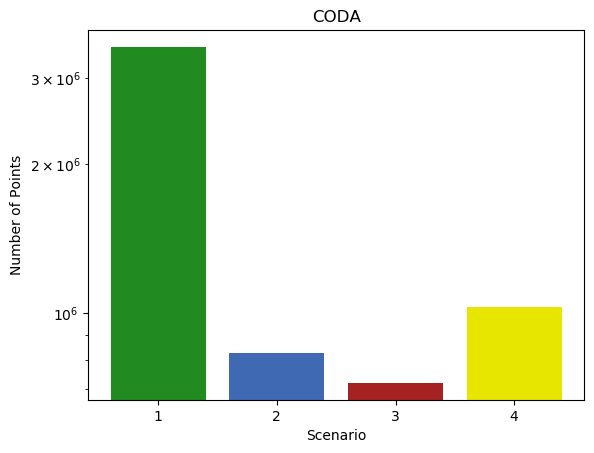

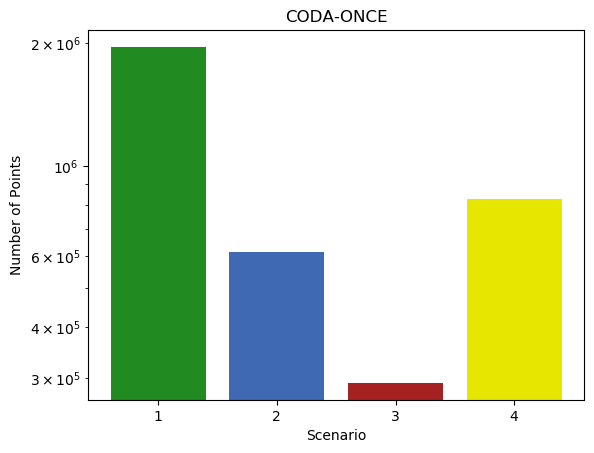

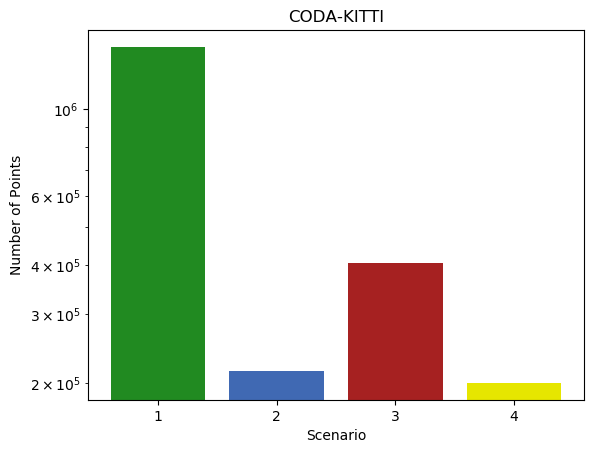

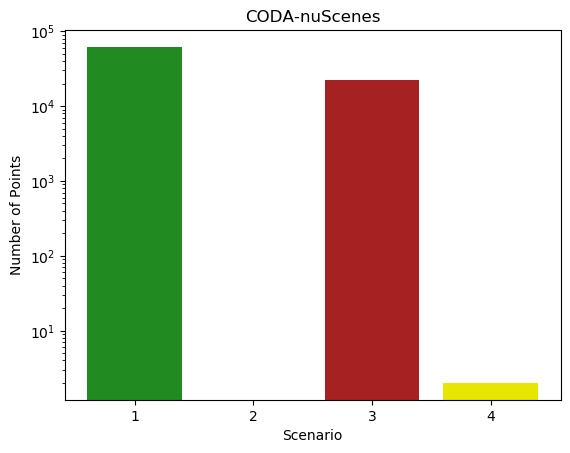

In [17]:
names = ['CODA', 'CODA-ONCE', 'CODA-KITTI', 'CODA-nuScenes']
for index, s in enumerate(sum_all):
    scenario1 = s[0] + s[4] + s[10]
    scenario2 = s[1] + s[5] + s[11]
    scenario3 = s[2] + s[6] + s[12]
    scenario4 = s[3] + s[7] + s[13] 
    scenarios = [scenario1, scenario2, scenario3, scenario4]
    
    plt.bar(['1', '2', '3', '4'], scenarios, color=[(0.13,0.54,0.13), (0.25,0.41,0.7), (0.65,0.13,0.13), (0.9,0.9,0)])
    plt.xlabel('Scenario')
    plt.ylabel('Number of Points')
    plt.yscale('log')
    plt.title(f'{names[index]}')
    
    plt.savefig(f'/disk/no_backup/ju878/model_contradictions/create_coda/graphics/points_per_scenario_{names[index]}.svg', format='svg', dpi=1200)
    plt.show()
    plt.close()